# Exercises
Create a file named `seaborn_exercises.py` or `seaborn_exercises.ipynb` for this exercise.

Use the `iris` database to answer the following quesitons:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data


In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [52]:
data('iris', show_doc=True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [4]:
# tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris.species.nunique()

3

1. What does the distribution of petal lengths look like?

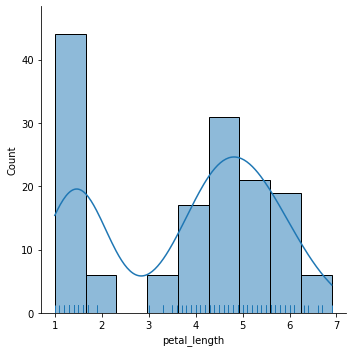

In [12]:
sns.displot(
    data=iris,
    x = 'petal_length',
    kde = True,
    rug = True)

2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

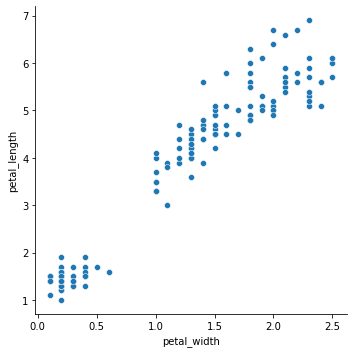

In [21]:
sns.relplot(data=iris, x='petal_width', y='petal_length')
# plt.title('Petal Length as a relation to Petal Width')

3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

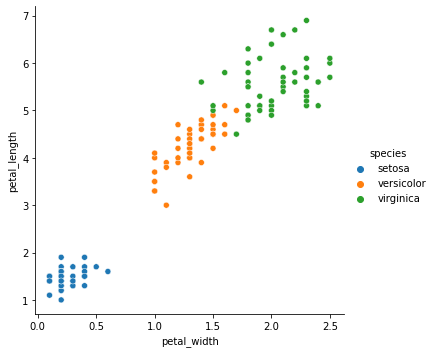

In [20]:
sns.relplot(data=iris, x='petal_width', y='petal_length', hue='species')
# plt.title('Petal Length as a relation to Petal Width')

4. Which features would be best used to predict species?

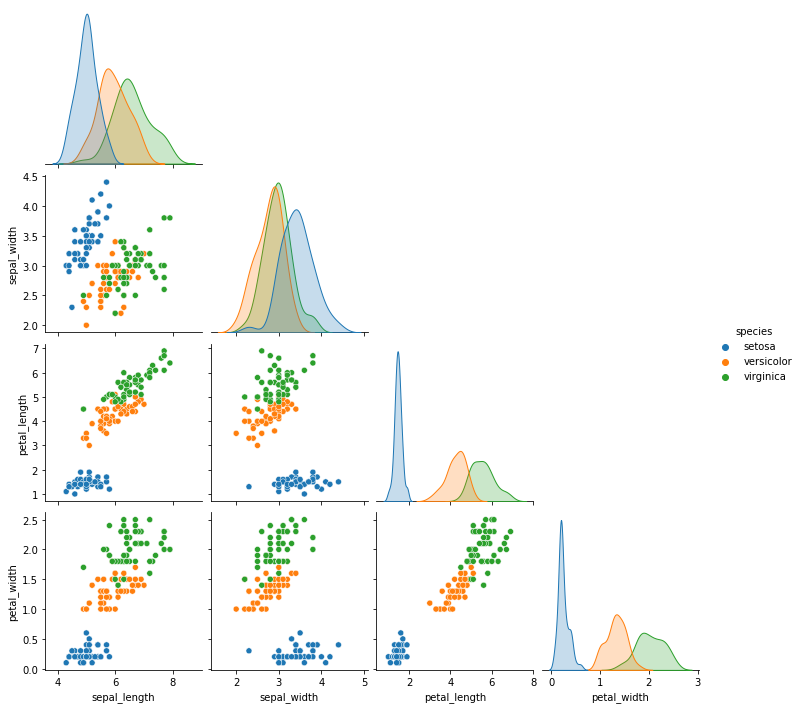

In [23]:
sns.pairplot(iris, hue='species', corner=True)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

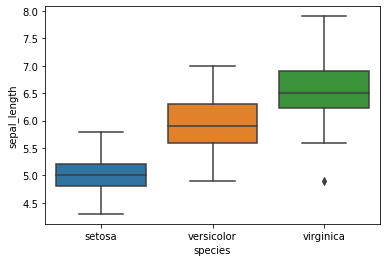

In [144]:
sns.boxplot(y= 'sepal_length', x = 'species', data = iris)

1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [24]:
anscombe = sns.load_dataset('anscombe')

In [56]:
data('anscombe', show_doc=True)

anscombe

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Anscombe's Quartet of ‘Identical’ Simple Linear Regressions

### Description

Four _x_-_y_ datasets which have the same traditional statistical properties
(mean, variance, correlation, regression line, etc.), yet are quite different.

### Usage

    anscombe

### Format

A data frame with 11 observations on 8 variables.

x1 == x2 == x3

the integers 4:14, specially arranged

x4

values 8 and 19

y1, y2, y3, y4

numbers in (3, 12.5) with mean 7.5 and sdev 2.03

### Source

Tufte, Edward R. (1989) _The Visual Display of Quantitative Information_,
13–14. Graphics Press.

### References

Anscombe, Francis J. (1973) Graphs in statistical analysis. _American
Statistician_, **27**, 17–21.

### Examples

    require(stats); require(graphics)
    summary(anscombe)
    ##-- now some "magic" to do the 4 regressions in a loop:
    ff <- y ~ x
    mods <- setNames(as.list(1:4), paste0("lm", 1:4))
 

In [25]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [41]:
anscombe.groupby(anscombe.dataset).describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

- Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

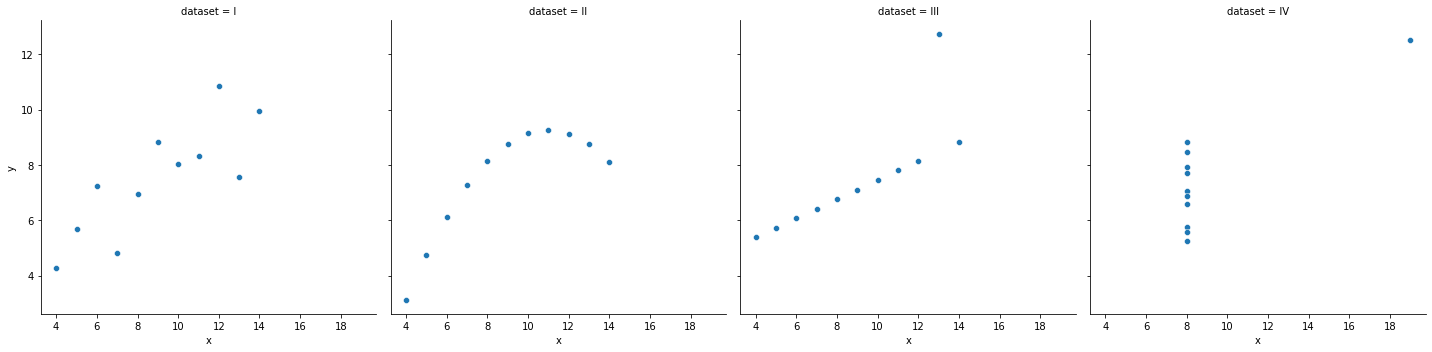

In [42]:
sns.relplot(data = anscombe, 
           x='x',
           y='y',
           col = 'dataset')

2. Load the `InsectSprays` dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [57]:
spray = data('InsectSprays')
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [58]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [59]:
spray.describe()

,count
count,72.000000
mean,9.500000
std,7.203286
min,0.000000
25%,3.000000
50%,7.000000
75%,14.250000
max,26.000000


In [65]:
spray.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


<AxesSubplot:xlabel='spray', ylabel='count'>

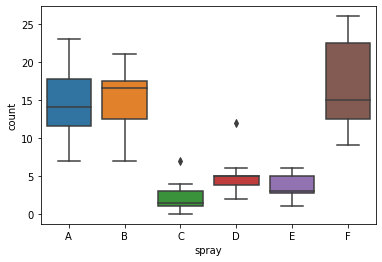

In [78]:
sns.boxplot(data=spray, x='spray', y='count')

In [74]:
spray_groups = spray.groupby('spray').groups

3. Load the `swiss` dataset and read it's documentation. The `swiss` dataset is available from `pydatset` rather than seaborn. Create visualizations to answer the following questions:

In [79]:
swiss = data('swiss')
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [80]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [81]:
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


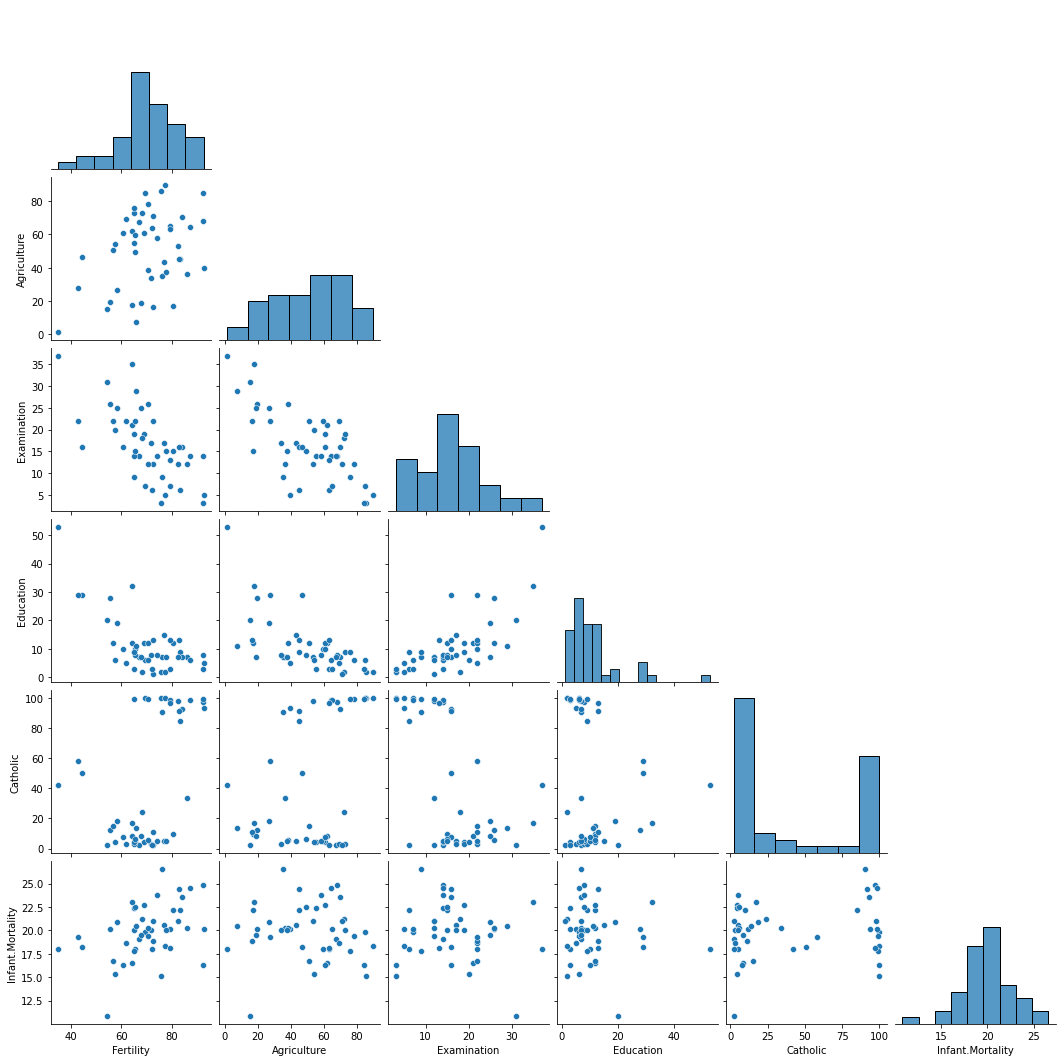

In [82]:
sns.pairplot(swiss,corner=True)

- Create an attribute named `is_catholic` that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [145]:
swiss['is_catholic'] = swiss['Catholic'] >= 50

In [107]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


- Does whether or not a province is Catholic influence fertility?

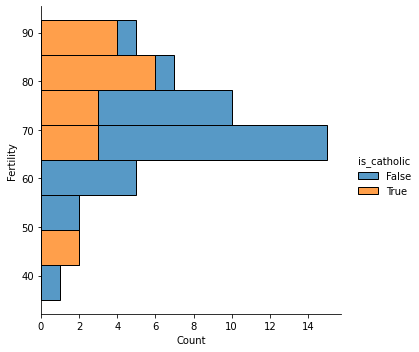

In [146]:
sns.displot(data=swiss, y='Fertility', hue='is_catholic', multiple='stack')

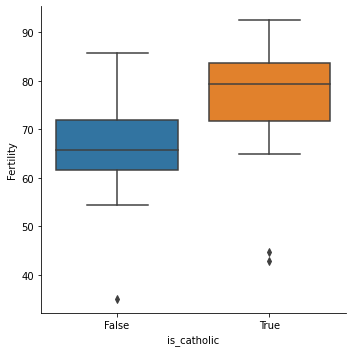

In [147]:
sns.catplot(data=swiss,
           x='is_catholic',
           y='Fertility',
           kind='box')

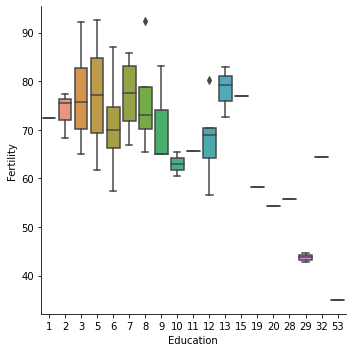

In [111]:
sns.catplot(data=swiss,
           x='Education',
           y='Fertility',
           kind='box')

<AxesSubplot:xlabel='Agriculture', ylabel='Fertility'>

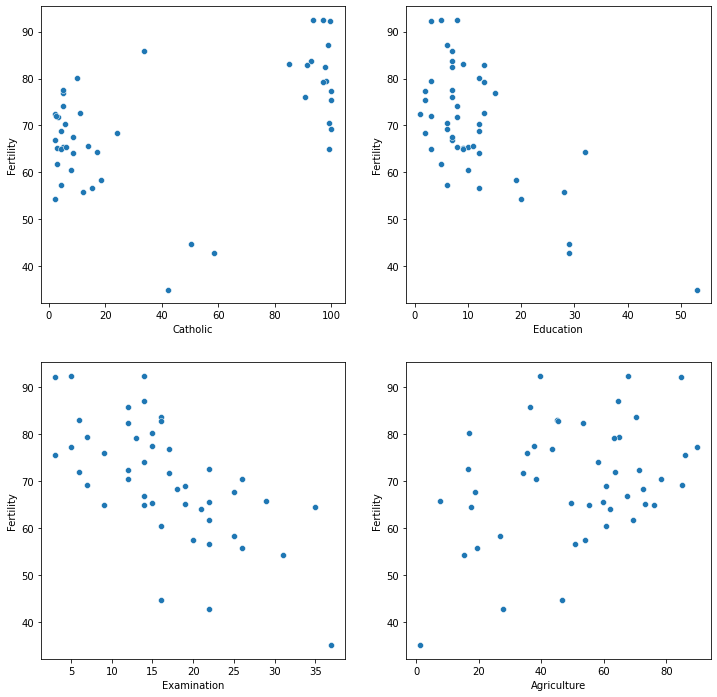

In [123]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

sns.scatterplot(data=swiss, x='Catholic', y='Fertility', ax=ax[0,0])
sns.scatterplot(data=swiss, x='Education', y='Fertility', ax=ax[0,1])
sns.scatterplot(data=swiss, x='Examination', y='Fertility', ax=ax[1,0])
sns.scatterplot(data=swiss, x='Agriculture', y='Fertility', ax=ax[1,1])

In [112]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
 6   is_catholic       47 non-null     bool   
dtypes: bool(1), float64(4), int64(2)
memory usage: 3.7+ KB


- What measure correlates most strongly with fertility?

In [153]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

In [131]:
swiss.Examination

Courtelary      15
Delemont         6
Franches-Mnt     5
Moutier         12
Neuveville      17
Porrentruy       9
Broye           16
Glane           14
Gruyere         12
Sarine          16
Veveyse         14
Aigle           21
Aubonne         14
Avenches        19
Cossonay        22
Echallens       18
Grandson        17
Lausanne        26
La Vallee       31
Lavaux          19
Morges          22
Moudon          14
Nyone           22
Orbe            20
Oron            12
Payerne         14
Paysd'enhaut     6
Rolle           16
Vevey           25
Yverdon         15
Conthey          3
Entremont        7
Herens           5
Martigwy        12
Monthey          7
St Maurice       9
Sierre           3
Sion            13
Boudry          26
La Chauxdfnd    29
Le Locle        22
Neuchatel       35
Val de Ruz      15
ValdeTravers    25
V. De Geneve    37
Rive Droite     16
Rive Gauche     22
Name: Examination, dtype: int64

4. Using the `chipotle` dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [3]:
from env import gdb

In [132]:
query = '''
                     SELECT *
                     FROM orders;
                     '''

In [133]:
def get_db_url(schema):
    import env
    user = env.username
    password = env.password
    host = env.host
    conn = f'mysql+pymysql://{user}:{password}@{host}/{schema}'
    return conn

In [134]:
orders = pd.read_sql(query, get_db_url('chipotle'))
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [5]:
orders = gdb('chipotle',
             '''
             SELECT * FROM orders;
             '''
            )

In [15]:
# best_sellers= orders.groupby('item_name').quantity.agg('sum')
best_sellers= orders.item_name.value_counts()[0:4]
pd.DataFrame(best_sellers)

,item_name
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368


<AxesSubplot:>

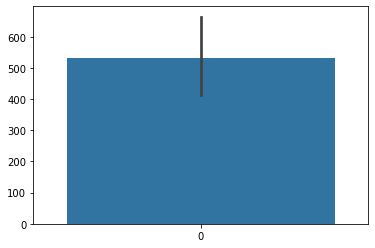

In [20]:
sns.barplot(data=best_sellers)

5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.